In [1]:
#Import libraries
import cv2
from google.colab.patches import cv2_imshow #for colab
import numpy as np
import matplotlib.pyplot as plt

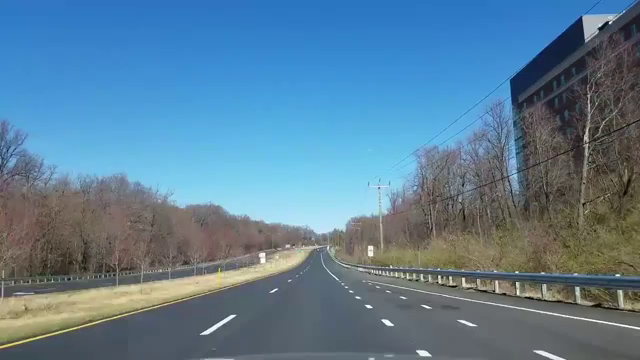

In [2]:
image = cv2.imread('test.png')
cv2_imshow(image)

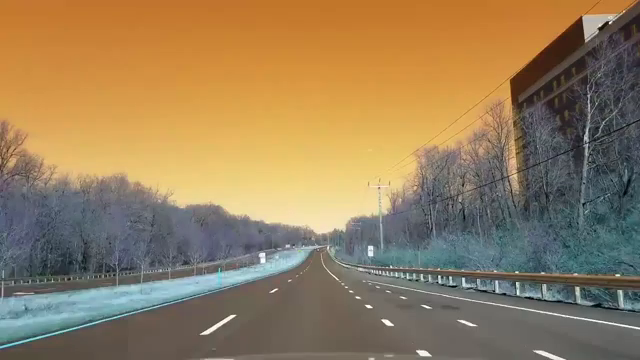

In [3]:
#We convert BGR to RGB. Because we will use matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)

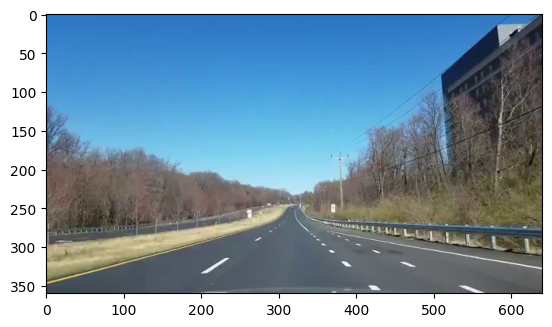

In [4]:
plt.imshow(image)

In [5]:
#Region is interest (for clear detection)
#And also we are detection just our own lane line
#Firstly we will look image shapes

height = image.shape[0]
width = image.shape[1]
print(image.shape)

(360, 640, 3)


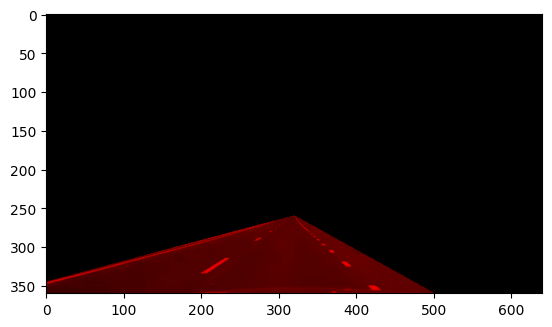

In [6]:
#Region of interest vertices
region_of_interest_vertices = [
    (-60, height),         # Alt orta nokta
    (320, 260),            # Sağ üstte bir nokta
    (500, height)        # Alt sağ nokta
]


def region_of_interest(img, vertices):
    mask = np.zeros_like(img) #A mask is created to make pixels other than the ROI black.
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color) #A polygon is drawn to the mask, indicated by vertices (vertices).
    masked_image = cv2.bitwise_and(img, mask) #Combines the mask with the original image.
    return masked_image

#draw the lines
def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=8)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img


#Cropped Image
cropped_image = region_of_interest(image,
                                   np.array([region_of_interest_vertices], np.int32))

plt.imshow(cropped_image)

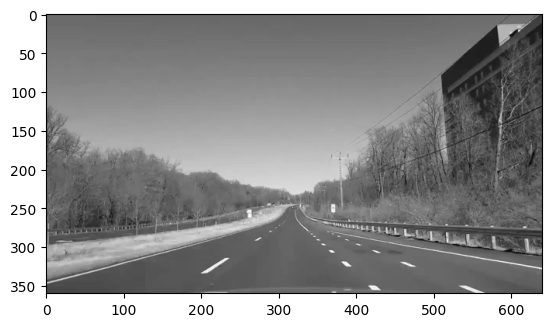

In [11]:
#find the edges
#Firstly covert to grayScale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

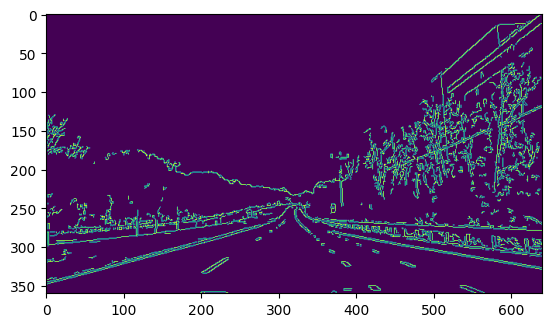

In [12]:
#edges detection
canny = cv2.Canny(gray_image, 100, 200) #For edge detection, if the gradient density is greater than threshold2, it is considered an edge.
plt.imshow(canny)

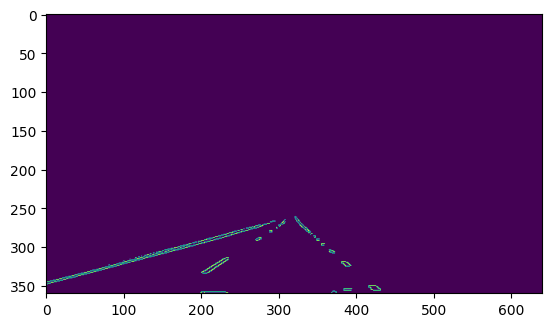

In [13]:
#Cropped Image
cropped_image = region_of_interest(canny,
                                   np.array([region_of_interest_vertices], np.int32))
plt.imshow(cropped_image)

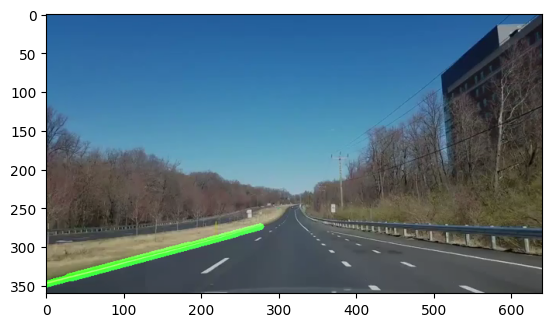

In [14]:
#half line transform
lines = cv2.HoughLinesP(cropped_image,
                        rho=6,
                        theta = np.pi/60,
                        threshold = 160,
                        lines = np.array([]),
                        minLineLength = 40,
                        maxLineGap = 25)

image_with_lines = draw_the_lines(image, lines)
plt.imshow(image_with_lines)

In [16]:
import cv2
import numpy as np

# Fonksiyonlar
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img_copy = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=5)
    img = cv2.addWeighted(img_copy, 0.8, blank_image, 1, 0.0)
    return img

def process(image):
    height = image.shape[0]
    width = image.shape[1]

    region_of_interest_vertices = [
    (-60, height),         # Alt orta nokta
    (320, 260),            # Sağ üstte bir nokta
    (500, height)        # Alt sağ nokta
    ]

    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 100, 120)
    cropped_image = region_of_interest(canny_image,
                    np.array([region_of_interest_vertices], np.int32),)
    lines = cv2.HoughLinesP(cropped_image,
                            rho=2,
                            theta=np.pi/180,
                            threshold=50,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=100)
    image_with_lines = drow_the_lines(image, lines)
    return image_with_lines

# Video işleme ve kaydetme
cap = cv2.VideoCapture('test_video.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    processed_frame = process(frame)
    out.write(processed_frame)

cap.release()
out.release()

# İşlenen MP4 videoyu Colab üzerinde indirme bağlantısı
from google.colab import files
files.download('output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>